### Feature Engineering con NumPy

Situación: Eres analista de una empresa de autos. Tienes datos de millaje (km/galón) y aceleración (segundos de 0 a 100 km/h) de 100 autos, pero sospechas que la relación no es lineal. Quieres crear **características polinómicas** para mejorar un modelo.

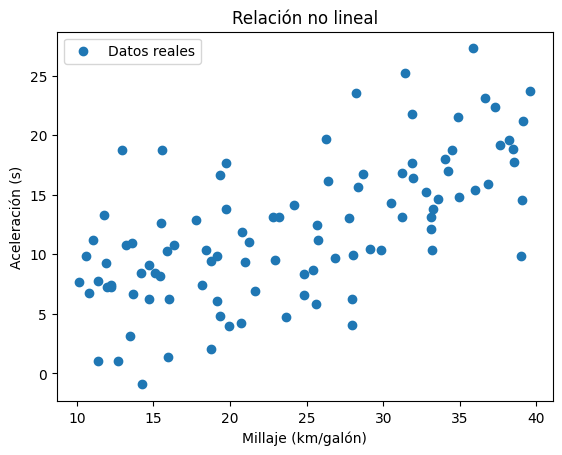

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos.
np.random.seed(42)
millaje = np.random.uniform(10, 40, 100)
aceleracion = 0.5 * millaje + np.random.normal(0, 5, 100)

# Crear características polinómicas (millaje²)
X = np.column_stack([millaje, millaje ** 2])

# Graficar
plt.scatter(millaje, aceleracion, label = 'Datos reales')
plt.xlabel('Millaje (km/galón)')
plt.ylabel('Aceleración (s)')
plt.title('Relación no lineal')
plt.legend()

plt.show()

Situación: En un estudio de agricultura, tienes datos de **lluvia (mm)** y **rendimiento de cultivos (ton/ha)**.

1. Genera 50 muestras con:

In [ ]:
lluvia = np.random.uniform(100, 1000, 50)
rendimiento = 0.01 * lluvia + 0.0001 * lluvia**2 + np.random.normal(0, 0.5, 50)

2. Crea una matriz **X** con **lluvia** y **lluva²**.
3. Grafica la relación original.

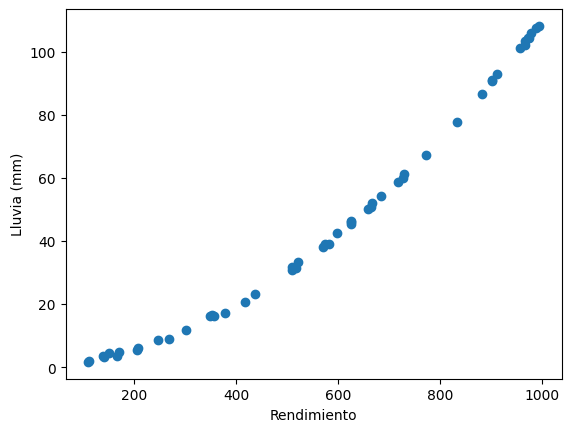

In [5]:
import numpy as np
import matplotlib.pyplot as plt

lluvia = np.random.uniform(100, 1000, 50)
rendimiento = 0.01 * lluvia + 0.0001 * lluvia ** 2 + np.random.normal(0, 0.5, 50)

X = np.column_stack([lluvia, lluvia ** 2])

plt.scatter(lluvia, rendimiento)
plt.ylabel('Lluvia (mm)')
plt.xlabel('Rendimiento')
plt.show()

---

### Árboles de Decisión con Podado (Pruning)

Situación: Trabajas en un banco. Tienes datos de **edad**, **ingresos anuales** (miles USD), y **morosidad** (0 = No, 1 = Sí) de clientes. Quieres un modelo interpretable que no sufra overfitting.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Datos
datos = {
    'edad': [25, 45, 30, 50, 23, 55, 33, 60],
    'ingresos': [40, 80, 60, 30, 35, 90, 70, 20],
    'morosidad': [0, 0, 0, 1, 0, 0, 1, 1]
}

df = pd.DataFrame(datos)

df

,edad,ingresos,morosidad
0,25,40,0
1,45,80,0
2,30,60,0
3,50,30,1
4,23,35,0
5,55,90,0
6,33,70,1
7,60,20,1


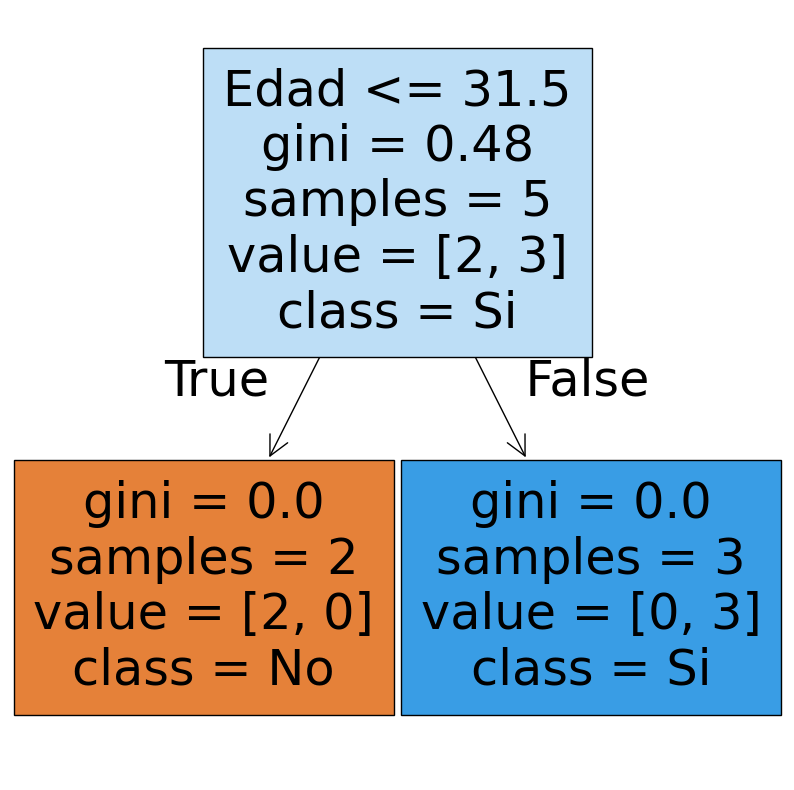

In [8]:
# Definir X e y
X = df[['edad', 'ingresos']]
y = df['morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Árbol con podado (max_depth = 2)
modelo = DecisionTreeClassifier(max_depth = 2, random_state = 42)
modelo.fit(X_train, y_train)

# Visualizar árbol.
plt.figure(figsize = (10, 10))
plot_tree(modelo, filled = True, feature_names = ['Edad', 'Ingresos'], class_names = ['No', 'Si'])

plt.show()

En una clínica, tienes datos de **presión arterial** y **colesterol** para predecir riesgo cardíaco (0 = Bajo, 1 = Alto).

1. Genera datos sintéticos:

In [ ]:
presion = np.random.randint(80, 180, 50)
colesterol = np.random.randint(150, 300, 50)
riesgo = np.where((presion > 140) | (colesterol > 240), 1, 0)

2. Entrena un árbol con max_depth = 3
3. Visualiza el árbol y explica las reglas.

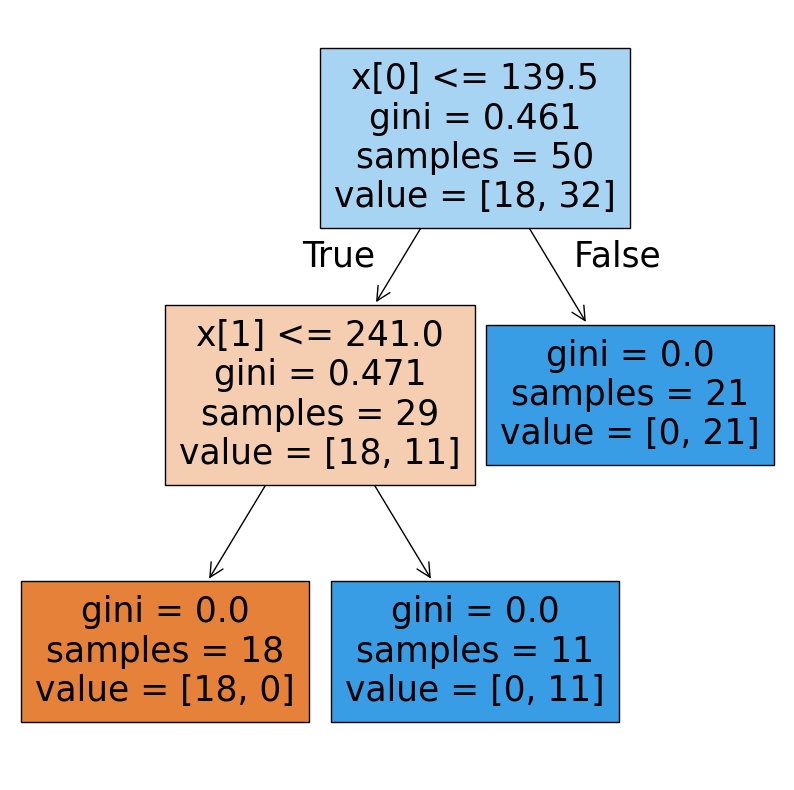

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree

presion = np.random.randint(80, 180, 50)
colesterol = np.random.randint(150, 300, 50)
riesgo = np.where((presion > 140) | (colesterol > 240), 1, 0)

X = np.column_stack([presion, colesterol])
modelo = DecisionTreeClassifier(max_depth = 3)
modelo.fit(X, riesgo)

plt.figure(figsize = (10, 10))
plot_tree(modelo, filled = True)
plt.show()

---

### Reducción de Dimensionalidad con PCA

Situación: Analizas imágenes de rostros (cada pixel es una feature). Tienes 100 features pero sospechas que solo 10 componentes capturan la esencia. Quieres reducir la dimensionalidad.

In [11]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Datos sintéticos
X, y = make_classification(n_samples = 100, n_features = 100, n_informative = 10, random_state = 42)

# Aplicar PCA
pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X)

print('Varianza explicada por cada componente:', pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.11644338 0.08189646 0.07111937 0.04308423 0.03906745 0.036263
 0.02882874 0.02787917 0.02374482 0.02232875]


Tienes datos de sensores (20 features) para predecir fallas en máquinas.

1. Genera datos con:

In [ ]:
X, y = make_classification(n_samples=200, n_features=20, n_informative=5, random_state=42)

2. Aplica PCA para reducir a 5 componentes.
3. ¿Qué porcentaje de varianza explican?

In [13]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 20, n_features = 20, n_informative = 5, random_state = 42)

pca = PCA(n_components = 5).fit(X)
X_pca = pca.fit_transform(X)

print("Varianza explicada:", pca.explained_variance_ratio_.sum())

Varianza explicada: 0.7593068353322584
